##### Importing the necessary modules

* librosa: To manage and extract features from the audio files.
* os: To list all the files from the directories.
* numpy: To manage the numeric arrays.
* pyplot from matplotlib: To plot different data on the graph.
* soundfile: To open and write the audio files.
* pandas: To create and manage DataFrames.

In [1]:
import librosa
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import soundfile
import pandas as pd
print(librosa.__version__)
dir(librosa.display)
print(matplotlib.__version__)

0.10.2
3.7.1


* Load the /audio/sample_data.wav file using librosa.
* Calculate the correlation of the audio file using the librosa module.
* Plot the correlation using matplotlib.


[Text(0.5, 1.0, 'Auto-correlation'),
 Text(0.5, 0, 'Lag (frames)'),
 Text(0, 0.5, 'Correlation')]

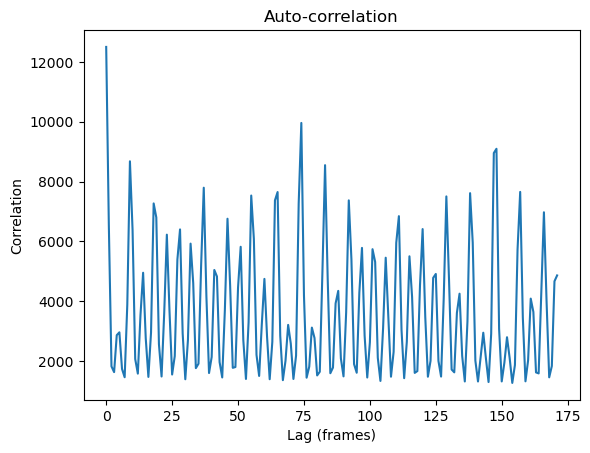

In [2]:
y, sr = librosa.load('../audio/example.wav')
onset_strength = librosa.onset.onset_strength(y=y, sr=sr, hop_length=512)
correlation = librosa.autocorrelate(onset_strength, max_size=4 * sr // 512)
fig, ax = plt.subplots()
ax.plot(correlation)
ax.set(title='Auto-correlation', xlabel='Lag (frames)', ylabel = 'Correlation')

##### The following waveforms of the audio were plotted using the display module available in librosa:

* Monophonic view of the audio file.
* Harmonic view of the audio file.
* Percussive view of the audio file.

The following steps were performed:

* Two subplots were created using matplotlib, so that I could plot multiple waveforms in a single graph.
* The librosa.display method was used to plot the monophonic view of the audio file.
* The librosa.display method was used to plot the harmonic and percussive values of the audio file.

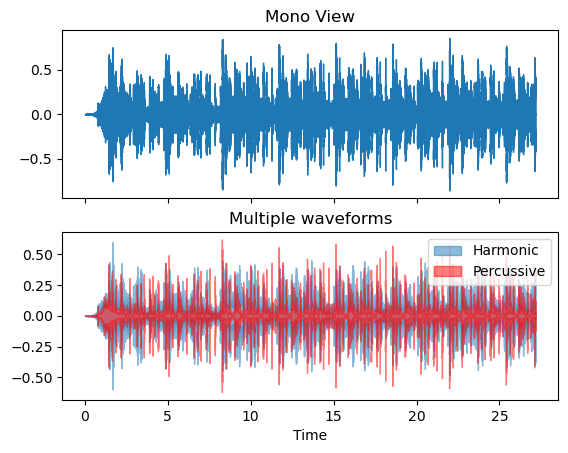

In [3]:
# Apply harmonic-percussive source separation
y_harm, y_perc = librosa.effects.hpss(y)

# Create subplots
fig, ax = plt.subplots(nrows=2, sharex=True)

# Display the waveform of the original audio
librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set(title='Mono View')
ax[0].label_outer()

# Display the waveforms of the harmonic and percussive components
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax[1], label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[1], label='Percussive')
ax[1].set(title='Multiple waveforms')
ax[1].legend()


#### My Reasoning: Since machine learning modules work with numeric values, but data in this project is of audio files, it is required to convert the audio files to numeric values. To convert the audio files into numeric values, I need to extract the features from an audio file.

### Extracting features from the audio file.

#### My Task Breakdown Approach:

* Create a new method that accepts an audio file and opens it using the soundfile module.
* Get the mel frequency cepstral coefficients (mfcc) of the audio file using the librosa. This small set of features describes the overall shape of the spectral envelope.
* Get the chroma feature of the audio file. This feature describes the pitch of the audio file.
* Get the spectral scale of pitches of the audio file.
* Create a new NumPy list and add all of these features to that list and return it.

In [4]:
import numpy as np
import librosa
import soundfile

def extract_feature(file_name):
    try:
        with soundfile.SoundFile(file_name) as sound_file:
            file = sound_file.read(dtype="float32")
            print("Original data shape:", file.shape)
            
            if file.ndim == 2:  # Check if stereo and convert to mono
                file = librosa.to_mono(file.T)
                print("Converted to mono. New data shape:", file.shape)
            
            sample_rate = sound_file.samplerate
            print("Sample rate:", sample_rate)
            
            # Calculate MFCC
            mfcc = librosa.feature.mfcc(y=file, sr=sample_rate, n_mfcc=40)
            mel_frequency = np.mean(mfcc.T, axis=0)
            result = np.hstack((mel_frequency))
            
            # Calculate Chroma
            chroma = librosa.feature.chroma_stft(y=file, sr=sample_rate)
            chroma_mean = np.mean(chroma.T, axis=0)
            result = np.hstack((result, chroma_mean))
            
            # Calculate Spectral Scale
            spectral_scale = librosa.feature.melspectrogram(y=file, sr=sample_rate)
            spectral_scale_mean = np.mean(spectral_scale.T, axis=0)
            result = np.hstack((result, spectral_scale_mean))
            
            return result
    except Exception as e:
        print("An error occurred:", e)
        return None

feature_vector = extract_feature('../audio/example.wav')
print("Extracted feature vector:", feature_vector)


Original data shape: (870191, 2)
Converted to mono. New data shape: (870191,)
Sample rate: 32000
Extracted feature vector: [-2.12290985e+02  1.10028122e+02  2.89514275e+01  4.26283951e+01
  1.84157143e+01  6.65443707e+00  1.11963902e+01  1.39393406e+01
  6.98561335e+00  4.05779123e+00 -6.00170279e+00 -5.74053526e-01
  7.76258469e-01  4.50453281e+00 -1.17774229e+01  2.44949961e+00
  2.74480987e+00 -8.87850821e-01 -5.38038731e+00  3.44142175e+00
 -3.03354597e+00  6.15223981e-02 -1.07443821e+00  2.50313330e+00
  3.50845098e+00  1.48923743e+00 -3.04806560e-01  1.63872564e+00
 -6.47562504e+00 -2.95931554e+00 -7.92008400e-01  8.82701039e-01
 -1.43446639e-01 -2.21023887e-01 -2.87494993e+00  7.97476545e-02
 -4.33070153e-01  3.00146013e-01 -1.99644375e+00 -9.50221717e-01
  3.82045150e-01  3.61636102e-01  3.99053842e-01  4.60678339e-01
  4.19396877e-01  5.53831697e-01  4.47550923e-01  4.17543292e-01
  5.01404285e-01  6.25039399e-01  7.46403575e-01  4.96122986e-01
  1.60124245e+01  5.28047829e+01

##### Create a new dictionary with the labels of the audio files. Each audio file is named an XX-XX-XX-XX-XX-XX-XX.wav file, where each X represents a number, and the third section of the name contains the code which represents the emotion in the training data set. These codes are as follows:

* 01: This represents the neutral emotion.
* 02: This represents the calm emotion.
* 03: This represents the happy emotion.
* 07: This represents the disgust emotion.

In [5]:
emotions = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '07': 'disgust',
}
observed_emotions = ['neutral', 'calm', 'happy', 'disgust']

#### Create a new method that will load the audio files and convert them into a dataset of their features and their labels.
#####  My Task Breakdown Approach:
* Create a new method that accepts the BasePath of the directory where audio files are.
* Use the os module to get all files from the directory.
* Use the extract_feature() method to get the features of the audio file.
* Use the file’s name to split the name and get the label by dictionary.
* Return the data and labels of all files from this method.


In [6]:
def load_data(BasePath):
    data, labels = [], []
    for root, dirc, files in os.walk(BasePath):
        for file in files:
            found = True
            if file[-3:] == 'wav':
                file = os.path.join(root, file)
                emotionValue = file.split("-")[2]
                if int(emotionValue) < 4 or int(emotionValue) == 7:
                    emotion = emotions[file.split("-")[2]]
                    if emotion not in observed_emotions:
                        found = False
                    if found:
                        feature = extract_feature(file)
                        data.append(feature)
                        labels.append(emotion)
    return np.array(data), labels

data, labels = load_data("../Data")
print("Shape of data: ", data.shape)
print("Number of labels: ", len(labels))

Original data shape: (60327,)
Sample rate: 16000
Original data shape: (56590,)
Sample rate: 16000
Original data shape: (63530,)
Sample rate: 16000
Original data shape: (51785,)
Sample rate: 16000
Original data shape: (58192,)
Sample rate: 16000
Original data shape: (62463,)
Sample rate: 16000
Original data shape: (61929,)
Sample rate: 16000
Original data shape: (60861,)
Sample rate: 16000
Original data shape: (64598,)
Sample rate: 16000
Original data shape: (61929,)
Sample rate: 16000
Original data shape: (56056,)
Sample rate: 16000
Original data shape: (64598,)
Sample rate: 16000
Original data shape: (59793,)
Sample rate: 16000
Original data shape: (52853,)
Sample rate: 16000
Original data shape: (62996,)
Sample rate: 16000
Original data shape: (62462,)
Sample rate: 16000
Original data shape: (57124,)
Sample rate: 16000
Original data shape: (52319,)
Sample rate: 16000
Original data shape: (60861,)
Sample rate: 16000
Original data shape: (56056,)
Sample rate: 16000
Original data shape:

##### Create a classifier to classify the data

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

##### Split the training and testing data

In [8]:
training_x, testing_x, training_y, testing_y = train_test_split(data, labels, test_size=0.3, random_state=5, shuffle=True, stratify=labels)

##### Plot the labels of the testing dataset to see the number of emotions available in the testing dataset

<Axes: xlabel='Emotions'>

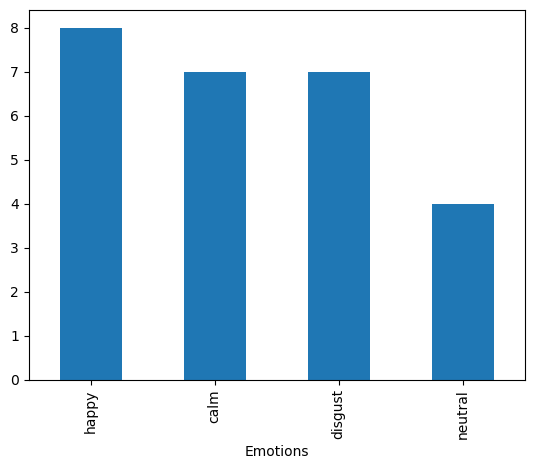

In [9]:
df = pd.DataFrame(testing_y, columns=['Emotions'])
df.Emotions.value_counts().plot(kind='bar')

##### After the feature extraction, let’s initialize the classifier to the training data

##### The Theory behind my approach:
Initialize the multi-layer perceptron (MLP) Classifier from scikit-learn. This is an algorithm to optimize the log loss using stochastic gradient descent. This method accepts the following parameters:
* alpha: This defines the penalty to the loss function. This uses the L2 regularization.
* batch_size: This defines the size of mini-batches in the stochastic optimizer.
* hidden_layer_sizes: This defines the number of neurons in the hidden layers.
* learning_rate: This defines the rate of learning of the algorithm. This is defined as a string value. adaptive value makes the algorithm adapt to the learning.
* max_iter: This defines the number of iterations to apply to the training data. With each iteration, it checks the prediction and updates itself.

In [10]:

model=MLPClassifier(alpha=0.1, batch_size=30, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

##### After initializing the classifier, use the classifier to get the prediction on the training data of datasets. After the classification, get the predictions from the model.

In [11]:
model.fit(training_x, training_y)

/Users/stevearmstrong/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.1, batch_size=30, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [12]:
predictions = model.predict(testing_x)
print(predictions)

['calm' 'happy' 'disgust' 'happy' 'calm' 'calm' 'disgust' 'happy'
 'neutral' 'happy' 'neutral' 'neutral' 'disgust' 'happy' 'disgust'
 'disgust' 'disgust' 'neutral' 'calm' 'happy' 'disgust' 'calm' 'neutral'
 'happy' 'disgust' 'calm']


##### After getting the predictions from the classifier, we compare them with the true values.

In [13]:
for i in range(len(testing_y)):
    print(testing_y[i], " - ", predictions[i])
score = accuracy_score(y_true=testing_y, y_pred=predictions)
print("Accuracy: ", score*100, "%")

calm  -  calm
happy  -  happy
disgust  -  disgust
happy  -  happy
calm  -  calm
calm  -  calm
disgust  -  disgust
happy  -  happy
neutral  -  neutral
happy  -  happy
neutral  -  neutral
calm  -  neutral
disgust  -  disgust
happy  -  happy
disgust  -  disgust
happy  -  disgust
disgust  -  disgust
neutral  -  neutral
calm  -  calm
happy  -  happy
disgust  -  disgust
calm  -  calm
neutral  -  neutral
happy  -  happy
disgust  -  disgust
calm  -  calm
Accuracy:  92.3076923076923 %


##### Model Evaluation Results
In this section, we examine the performance of the emotion recognition model by comparing the predicted labels against the true labels from the test dataset. Below is a summary of the predictions:

| True Label | Predicted Label |
|------------|-----------------|
| calm       | calm            |
| happy      | happy           |
| disgust    | disgust         |
| happy      | happy           |
| calm       | calm            |
| calm       | calm            |
| disgust    | disgust         |
| happy      | happy           |
| neutral    | neutral         |
| happy      | happy           |
| neutral    | neutral         |
| calm       | neutral         |
| disgust    | disgust         |
| happy      | happy           |
| disgust    | disgust         |
| happy      | disgust         |
| disgust    | disgust         |
| neutral    | neutral         |
| calm       | calm            |
| happy      | happy           |
| disgust    | disgust         |
| calm       | calm            |
| neutral    | neutral         |
| happy      | happy           |
| disgust    | disgust         |
| calm       | calm            |

##### **Accuracy**
The overall accuracy of the model is **92.31%**. This metric indicates that the model correctly predicts the emotion label **92.31%** of the time across the dataset used for testing.

##### Plot the loss curve using the model after completing the model and getting all the predictions.

##### Theory behind my Approach:

A loss curve during training is one of the most commonly used plots for debugging a neural network. It provides a snapshot of the training process and the learning trajectory of the network.

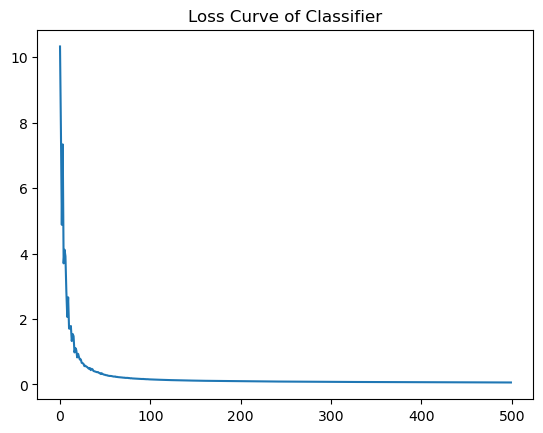

In [14]:
loss = model.loss_curve_
plt.title("Loss Curve of Classifier")
plt.plot(loss)

##### Loss Curve Analysis

##### Observations:
- **Initial Decline**: The curve shows a sharp decline in loss at the beginning of training, indicating that the model quickly learned a substantial amount of information from the training data.
- **Stabilization**: After the initial steep drop, the loss levels off and remains low and stable, suggesting that the model has reached a point of convergence.

##### Significance:
This behavior of the loss curve is typical for well-tuned models. The rapid decrease and subsequent stabilization without significant fluctuations or increases in loss suggest that the model is neither underfitting nor overfitting significantly.

##### Conclusion:
Given this loss curve, we can infer that the model has effectively minimized the training loss and is likely to have good performance on unseen data, assuming the test set is similarly distributed to the training set.


##### Saving the model to pkl file for future re-use.

In [15]:
import pickle

saved_model = '../models/model.pkl'
with open(saved_model, 'wb') as file:
    pickle.dump(model, file)


##### Load the Model from the .pkl File

In [16]:
# Load the pickled model
with open(saved_model, 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model to make predictions
predictions = loaded_model.predict(testing_x)


In [30]:
accuracy = accuracy_score(testing_y, predictions)
print("Re-confirming the Accuracy of the model on test data:", accuracy)

Re-confirming the Accuracy of the model on test data: 0.9230769230769231


##### **Confusion Matrix**

The confusion matrix below provides a visualization of the model's performance across different classes. Each row of the matrix represents the instances in an actual class, while each column represents the instances in a predicted class.

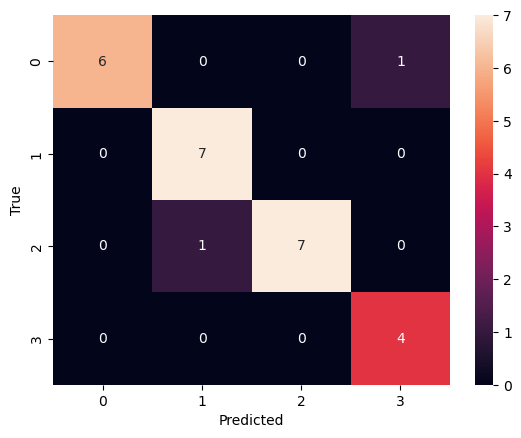

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(testing_y, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Confusion Matrix Analysis

##### Matrix Layout
- The matrix is structured with true labels along the y-axis and predicted labels along the x-axis.
- The diagonal cells (from top left to bottom right) represent the number of points for which the predicted label is equal to the true label.
- Off-diagonal cells represent misclassified points, where the predicted label does not match the true label.

##### Observations
- **Class 0 (Calm)**: Correctly predicted 6 times. No instances were misclassified as other emotions.
- **Class 1 (Happy)**: Correctly predicted 7 times. No misclassifications from or to other classes.
- **Class 2 (Disgust)**: Correctly predicted 7 times but was once misclassified as Class 1 (Happy).
- **Class 3 (Neutral)**: Perfectly predicted all 4 times.

##### Significance
- The model shows strong accuracy in predicting classes 0 (Calm), 1 (Happy), and 3 (Neutral) with no confusion between them.
- Class 2 (Disgust) shows some confusion with Class 1 (Happy), suggesting areas where the model may struggle or where features between these classes may overlap.

##### Conclusion
This confusion matrix reveals that the model is highly effective but still can be improved, especially in distinguishing between Disgust and Happy. Further analysis of the features or additional training data might help mitigate this confusion.



##### **Classification Report**

The classification report provides key metrics to evaluate the precision, recall, f1-score, and support for each class predicted by the model. These metrics are crucial for understanding the model's performance in detail.

In [19]:
from sklearn.metrics import classification_report

print(classification_report(testing_y, predictions))


              precision    recall  f1-score   support

        calm       1.00      0.86      0.92         7
     disgust       0.88      1.00      0.93         7
       happy       1.00      0.88      0.93         8
     neutral       0.80      1.00      0.89         4

    accuracy                           0.92        26
   macro avg       0.92      0.93      0.92        26
weighted avg       0.94      0.92      0.92        26



#### Classification Report Analysis

##### Metric Definitions
- **Precision**: Indicates the proportion of positive identifications that were actually correct, calculated as the number of true positives divided by the number of all positive predictions.
- **Recall**: Indicates the proportion of actual positives that were identified correctly, calculated as the number of true positives divided by the number of actual positives.
- **F1-Score**: Combines precision and recall into a single metric by taking their harmonic mean. It is particularly useful when the class distribution is uneven.
- **Support**: The number of actual occurrences of each class in the dataset, which helps indicate the size of the dataset for each class.

##### Performance by Class
- **Calm**: High precision (1.00) but slightly lower recall (0.86), leading to an F1-score of 0.92. This suggests excellent identification when predicted but some instances were missed.
- **Disgust**: Good balance with a precision of 0.88 and perfect recall (1.00), resulting in an F1-score of 0.93.
- **Happy**: Identical to Calm, with perfect precision and slightly lower recall.
- **Neutral**: Lower precision (0.80) but perfect recall, resulting in an F1-score of 0.89.

##### Overall Performance
- **Accuracy**: The overall accuracy of the model across all predictions is 92.31%.
- **Macro Average**: Average precision, recall, and F1-score across all classes without weighting (0.92, 0.93, 0.92).
- **Weighted Average**: These averages account for class imbalance by weighting the score of each class by its presence in the dataset.

##### Conclusion
The model performs well across all classes with particularly strong results in recall. The variations in precision across classes suggest potential areas for improvement, particularly for the 'Neutral' class where precision is notably lower than recall. Efforts to improve the model could focus on distinguishing features that may enhance precision without sacrificing recall.


##### **ROC Curves**

The ROC curves below provide a visual representation of our classification model's performance across different classes. The ROC curve is a plot of the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.



In [25]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

classes = np.unique(testing_y)
y_test_binarized = label_binarize(testing_y, classes=classes)
predictions_binarized = label_binarize(predictions, classes=classes)

n_classes = y_test_binarized.shape[1]


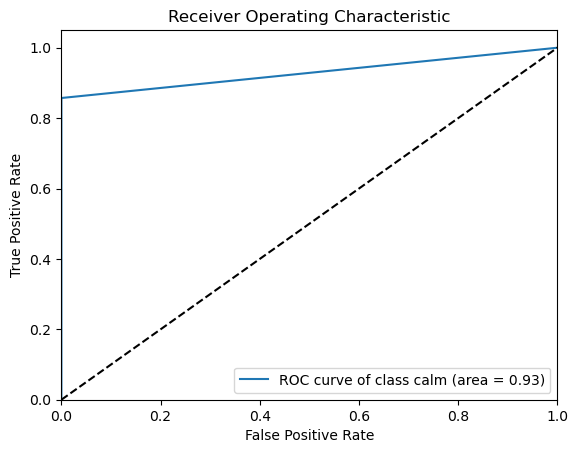

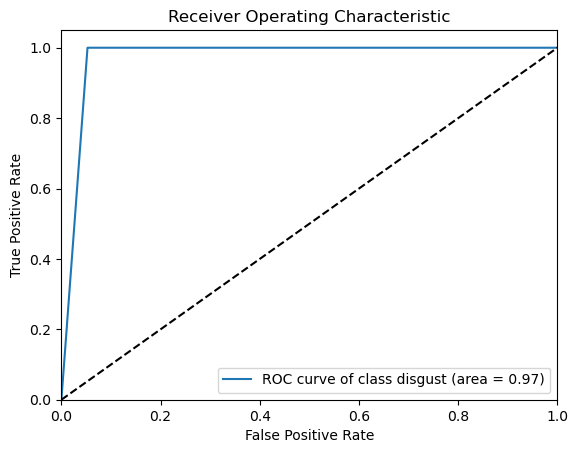

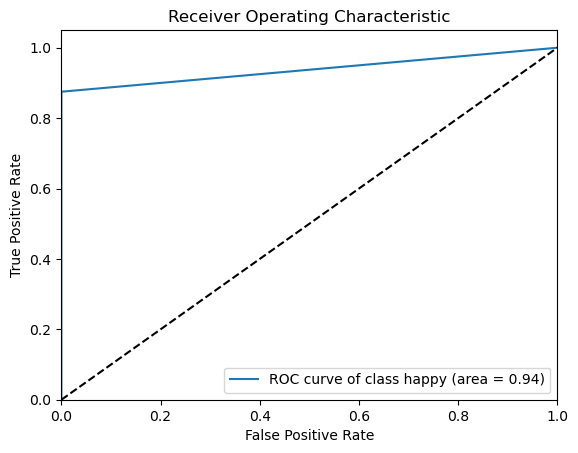

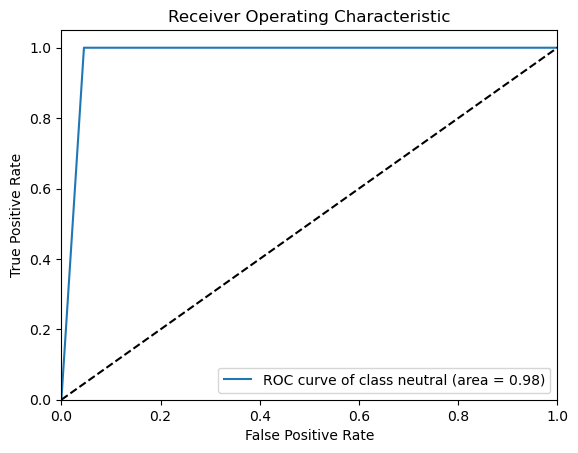

In [26]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], predictions_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {classes[i]} (area = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


#### Analysis of ROC Curves

##### Understanding ROC Curves
- **True Positive Rate (TPR)**, also known as recall or sensitivity, measures the proportion of actual positives that are correctly identified as such (TP/TP + FN).
- **False Positive Rate (FPR)** is defined as the proportion of actual negatives that are incorrectly labeled as positives (FP/FP + TN).

##### Significance of AUC
- The **Area Under the ROC Curve (AUC)** measures the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1). It provides an aggregate measure of performance across all possible classification thresholds.
- An AUC of 0.5 suggests no discriminative ability (same as random guessing), while an AUC of 1.0 represents perfect prediction.

##### ROC Curves and AUC Scores for Each Class
- **Calm**: AUC = 0.93, indicating very good classification performance.
- **Disgust**: AUC = 0.97, showing excellent ability to distinguish this class from others.
- **Happy**: AUC = 0.94, also reflecting very good performance.
- **Neutral**: AUC = 0.98, demonstrating almost perfect classification capability.

##### Conclusion
The high AUC values across all classes suggest that the model is highly capable of distinguishing between different emotional states based on the features it learned. The excellent AUC scores for 'Neutral' and 'Disgust' are particularly notable, indicating that these classes are very well defined by the model. Areas for potential improvement could focus on where the AUC is relatively lower, though all scores indicate strong performance.


### Precision-Recall Curves

The Precision-Recall curves below provide a visual representation of our classification model's performance for each emotional class. These curves are useful for understanding the trade-off between precision and recall for different threshold settings, especially in scenarios where classes are imbalanced.


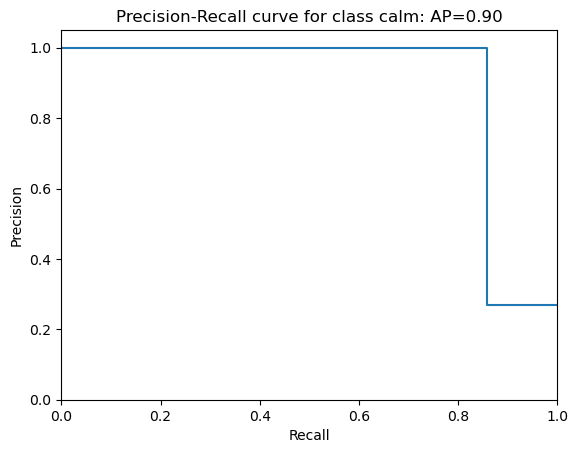

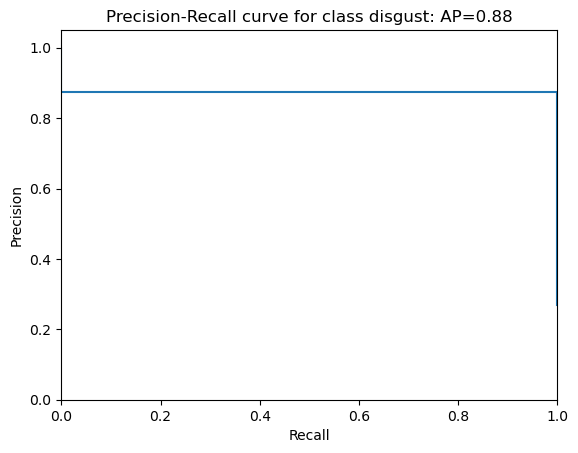

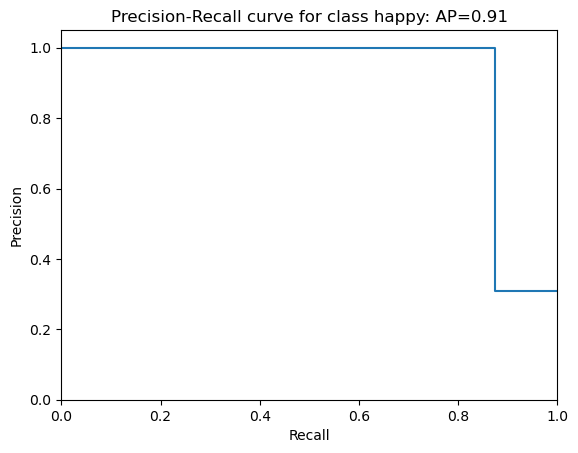

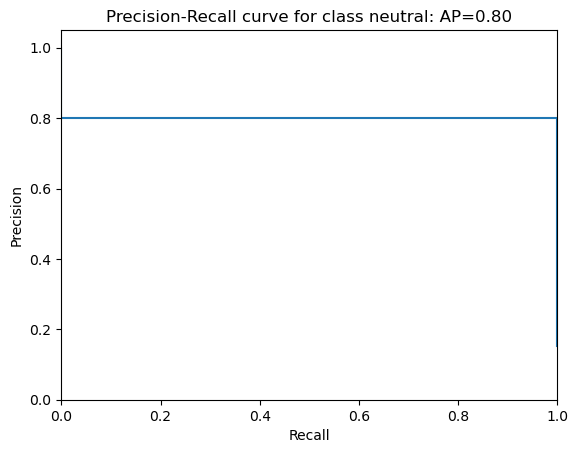

In [27]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score
import numpy as np
import matplotlib.pyplot as plt

classes = np.unique(testing_y)
testing_y_binarized = label_binarize(testing_y, classes=classes)

predictions_binarized = label_binarize(predictions, classes=classes)

n_classes = testing_y_binarized.shape[1]

precision = dict()
recall = dict()
average_precision = dict()

# Calculate precision-recall curve for each class
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(testing_y_binarized[:, i], predictions_binarized[:, i])
    average_precision[i] = average_precision_score(testing_y_binarized[:, i], predictions_binarized[:, i])

# Plot precision-recall curves
for i in range(n_classes):
    plt.figure()
    plt.step(recall[i], precision[i], where='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve for class {}: AP={:.2f}'.format(classes[i], average_precision[i]))
    plt.show()



### Analysis of Precision-Recall Curves

#### Understanding Precision-Recall Curves
- **Precision** (y-axis) measures the accuracy of positive predictions, calculated as the ratio of true positives to the sum of true and false positives.
- **Recall** (x-axis), also known as sensitivity, measures the ability of the classifier to find all the relevant cases (true positives).

#### Significance of Average Precision (AP)
- **Average Precision (AP)** summarizes the precision-recall curve as the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold used as the weight.
- An AP of 1.0 indicates perfect precision and recall at all thresholds, while an AP closer to 0 indicates poor performance.

#### Precision-Recall Curves and AP Scores for Each Class
- **Calm**: AP = 0.90. The curve shows high precision across most recall levels but drops sharply as recall approaches 1.0.
- **Disgust**: AP = 0.88. Maintains moderate to high precision across all recall levels, indicating robust performance.
- **Happy**: AP = 0.91. Exhibits very high precision for the majority of the recall range, dropping at very high recall.
- **Neutral**: AP = 0.80. Consistently high precision, indicating that when the model predicts 'neutral', it is very likely correct, although recall coverage is lower compared to other classes.

#### Conclusion
These Precision-Recall curves reveal varied performance across different classes, with 'Happy' showing the most robust ability to balance precision and recall. 'Neutral', while having a lower AP, still maintains high precision, suggesting it is rarely misclassified, but not all 'neutral' cases are captured. Efforts to improve the model could focus on expanding recall for 'Neutral' without compromising its high precision.


### Cross-Validation Results

Cross-validation is a statistical method used to estimate the skill of machine learning models. It is essential for assessing how the results of a statistical analysis will generalize to an independent data set. Particularly in predictive modeling, cross-validation is a vital step as it helps in diagnosing bias, variance, and overfitting, amongst other issues.

In [28]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
scores = cross_val_score(model, data, labels, cv=skf)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", np.mean(scores))


Cross-validation scores: [0.70588235 0.64705882 0.64705882 0.88235294 0.75      ]
Average cross-validation score: 0.7264705882352941


/Users/stevearmstrong/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### Cross-Validation Results Analysis

#### Implementation Details
For this model, **Stratified K-Fold cross-validation** with `n_splits=5` was utilized. This technique involves dividing the data into `k` distinct subsets, or "folds," which are stratified, meaning each fold is a good representative of the whole. Specifically, it ensures that each fold is approximately balanced regarding the number of samples from each class. This is particularly beneficial for datasets with imbalanced class distributions.

#### Cross-Validation Scores
The model was evaluated across five different subsets of the data, yielding the following scores:
- Fold 1: 0.7059
- Fold 2: 0.6471
- Fold 3: 0.6471
- Fold 4: 0.8824
- Fold 5: 0.7500

These scores represent the accuracy of the model for each fold.

#### Average Score
The average cross-validation score is **0.7265**, which provides a single measure of the model's overall predictive accuracy.

#### Analysis
The variation in scores across the different folds suggests differing levels of difficulty in the subsets of data, which might be due to the distribution of classes or particular characteristics within the subsets. The relatively high average score indicates that the model generally performs well but might benefit from further tuning or training to address variance between folds.

#### Conclusion
Overall, the cross-validation results suggest that the model is robust and generalizes well across different subsets of data, though there may be room for improvement in consistency across folds. Efforts to refine the model should focus on investigating and mitigating the sources of variation seen in the individual fold performances.
